In [8]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
#Perfermance comparison code

In [9]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

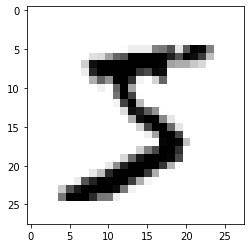

In [10]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0],cmap=plt.cm.binary)
plt.show()

In [11]:
print(y_train[0])

5


In [12]:
# Normalize the input data
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

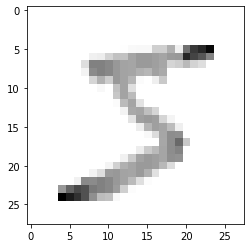

In [13]:
print(x_train[0])

plt.imshow(x_train[0],cmap=plt.cm.binary)
plt.show()

In [15]:
import numpy as np
def sin4(x):
    return tf.pow(tf.sin(x), 4)
# Define the neural network architecture
model = keras.Sequential([
    layers.Flatten(input_shape=(28,28), name='Input_layer'),
    layers.Dense(128, activation=sin4, name='Hidden_layer_1'),
    layers.Dense(128, activation=sin4, name='Hidden_layer_2'),
    layers.Dense(10, activation=tf.nn.softmax, name='Output_layer'),
])

# Compile the model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (Flatten)       (None, 784)               0         
                                                                 
 Hidden_layer_1 (Dense)      (None, 128)               100480    
                                                                 
 Hidden_layer_2 (Dense)      (None, 128)               16512     
                                                                 
 Output_layer (Dense)        (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [16]:

# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))


Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 0.2918 - accuracy: 0.9105 - val_loss: 0.1101 - val_accuracy: 0.9675
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0853 - accuracy: 0.9743 - val_loss: 0.1002 - val_accuracy: 0.9684
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0563 - accuracy: 0.9826 - val_loss: 0.0978 - val_accuracy: 0.9713
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0387 - accuracy: 0.9876 - val_loss: 0.0944 - val_accuracy: 0.9721
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0317 - accuracy: 0.9901 - val_loss: 0.0982 - val_accuracy: 0.9712
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0239 - accuracy: 0.9923 - val_loss: 0.1041 - val_accuracy: 0.9714
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0215 - accuracy: 0.9931 - val_loss: 0.1219 - val_accurac

In [17]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test loss:", test_loss*10, "%")
print("Test accuracy:", test_acc*10, "%")

313/313 [==============================] - 1s 2ms/step - loss: 0.1103 - accuracy: 0.9728
Test loss: 1.1025651544332504 %
Test accuracy: 9.728000164031982 %
